In [1]:
import numpy as np
import audio_utils
import dataset_utils
import all_scale
import Viewpoints
import svm_classifier
import os

path = r"E:\DATASET\v2"
fname = svm_classifier.get_inputs(path, ('003', '022'), 'Pitches')
fname_y = svm_classifier.get_inputs(path, ('003', '022'), 'Y')

X = np.load(os.path.join(path, fname[0]))
y = np.load(os.path.join(path, fname_y[0]))
print(X.shape, y.shape, y[0])

X_train, X_test, y_train, y_test = all_scale.train_test_split(X, y, test_size=0.1, shuffle=True, type='events')
print(X_train.shape, X_test.shape, y_train.shape)

1 files found! 
1 files found! 
(614, 155) (614,) 3
(6624, 155) (62, 155) (6624,)


In [ ]:
from sklearn import svm, metrics

classifier = svm.SVC(kernel='linear')
f1 = []
for iter in range(20):
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    f = metrics.f1_score(y_test, pred, pos_label=y[0])
    f1.append(f)
    X_train, X_test, y_train, y_test = all_scale.train_test_split(X, y, test_size=0.1, shuffle=True, type='events')

print(np.array(f1).sum() / len(f1))


1 files found! 
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

         3.0       0.00      0.00      0.00       0.0
        22.0       0.00      0.00      0.00      46.0

    accuracy                           0.00      46.0
   macro avg       0.00      0.00      0.00      46.0
weighted avg       0.00      0.00      0.00      46.0
 



    Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
    Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


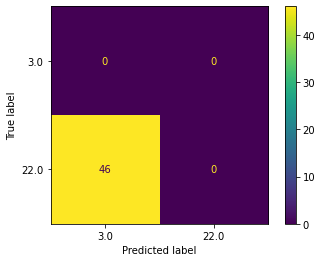

In [6]:
fname_test = svm_classifier.get_inputs(path, ('041', ), 'PCD')
X_Test = np.load(os.path.join(path, fname_test[0]))
predicted = classifier.predict(X_Test)


y_Test = np.zeros(len(X_Test), dtype='int32')
y_Test = y_Test + 22
# print(y_Test)


print("Classification report for thee classifier: %s\n %s \n" %
      (classifier, metrics.classification_report(y_Test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_Test, y_Test)